##  EDA - Real Estate Dataset
Exploring the Bengaluru Real estate data to identifying patterns.
Perform operations and ask questions about the data and find answers on it.

### Importing packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

### Import the dataset

In [2]:
df = pd.read_csv(os.getcwd() + "\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Univariate Analysis

Categorical data analysis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230D7D973A0>,
      dtype=object)

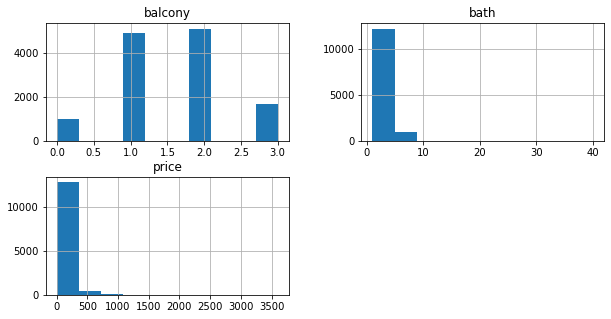

In [3]:
df.hist()

### Data Cleaning

In [4]:
df['area_type'].unique()
temp = df.groupby(['location']).median()


In [5]:
import re
df2 = df.copy()
df2 = df2.dropna(subset = ['size'])
df2['size'] = df2['size'].apply(lambda x: re.sub("\D","", str(x))).astype(float)


In [6]:
df2.isna().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [7]:
df2.dropna(subset = ['location'], inplace = True)
df2.drop(['society', 'area_type', 'availability'], inplace = True, axis = 1)

In [8]:
def convert_to_sqft(x):
    if '-' in x:
        temp = x.split('-')
        x = (float(temp[0]) + float(temp[1])) / 2 
    elif 'cent' in x.lower() :
        x = float(re.sub("\D","", x)) * 435.6
    elif 'acre' in x.lower():
        x = float(re.sub("\D","", x)) * 43560
    elif 'yard' in x.lower():
        x = float(re.sub("\D","", x)) * 9
    elif 'guntha' in x.lower():
        x = float(re.sub("\D","", x)) * 1,088.98
    elif 'meter' in x.lower():
        x = float(re.sub("\D","", x)) * 10.764
    elif 'ground' in x.lower():
        x = float(re.sub("\D","", x)) * 2400
    elif 'perch' in x.lower():
        x = float(re.sub("\D","", x)) * 272.25
    try:
        return float(x) 
    except:
        return None

In [9]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(lambda x: convert_to_sqft(x))
df3.dropna(subset = ['total_sqft'], inplace = True)

In [10]:
df3.isna().sum()

location        0
size            0
total_sqft      0
bath           57
balcony       593
price           0
dtype: int64

In [11]:
import logging
def balcony_fillna(series):
    for i in range(len(df3['balcony'])): 
        try:
            if df3['balcony'].isnull()[i] and series[i] <1: 
                df3['balcony'][i] = int(0)
                print(df3['balcony'][i])
            elif df3['balcony'].isnull()[i] and series[i] >= 1 and series[i] <= 2:
                df3['balcony'][i] = int(1)
            elif df3['balcony'].isnull()[i] and series[i] >= 3 and series[i] <= 6:
                df3['balcony'][i] = int(2)
            elif df3['balcony'].isnull()[i] and series[i] >= 7:
                df3['balcony'][i] = int(3)
        except KeyError:
            continue
        
    return df3

df4 = balcony_fillna(df3['size']).copy()

df4.dropna(subset = ['balcony'], inplace = True)

<ipython-input-11-274a012716ca>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['balcony'][i] = int(2)
<ipython-input-11-274a012716ca>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['balcony'][i] = int(1)
<ipython-input-11-274a012716ca>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['balcony'][i] = int(3)


In [12]:
df4.dropna(subset = ['bath'], inplace = True)
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230D861E430>,
      dtype=object)

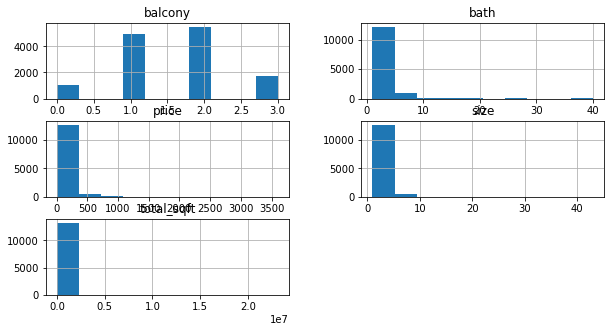

In [13]:
df4.hist()

In [14]:
from sklearn.preprocessing import LabelEncoder

lb_df = LabelEncoder()
df4["location_code"] = lb_df.fit_transform(df4["location"])
df4.head(15)

,location,size,total_sqft,bath,balcony,price,location_code
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,418
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,316
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,1177
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,755
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,714
5,Whitefield,2.0,1170.0,2.0,1.0,38.00,1250
6,Old Airport Road,4.0,2732.0,4.0,2.0,204.00,893
7,Rajaji Nagar,4.0,3300.0,4.0,2.0,600.00,974
8,Marathahalli,3.0,1310.0,3.0,1.0,63.25,797
9,Gandhi Bazar,6.0,1020.0,6.0,2.0,370.00,433


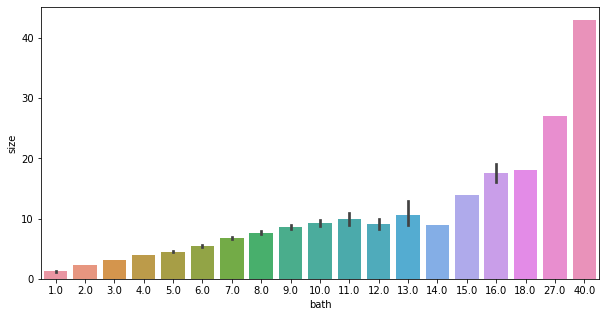

In [15]:
sns.barplot(df4['bath'], df4['size'])


In [16]:
df5 = df4[~(df4['total_sqft'] / df4['size'] < 200)]
df5 = df5[~(df5['total_sqft'] / df4['bath'] < 100)]


<ipython-input-16-2011927e33c7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df5[~(df5['total_sqft'] / df4['bath'] < 100)]


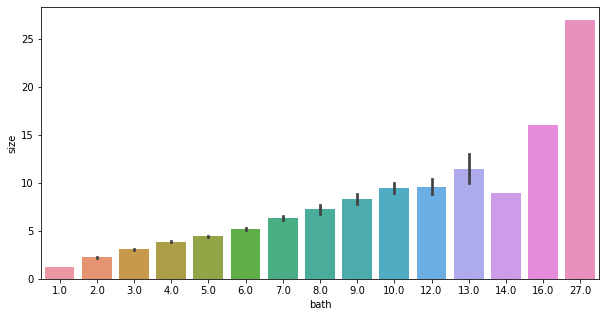

In [17]:
sns.barplot(df5['bath'], df5['size'])

In [18]:
df5.head()

,location,size,total_sqft,bath,balcony,price,location_code
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,418
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,316
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,1177
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,755
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,714


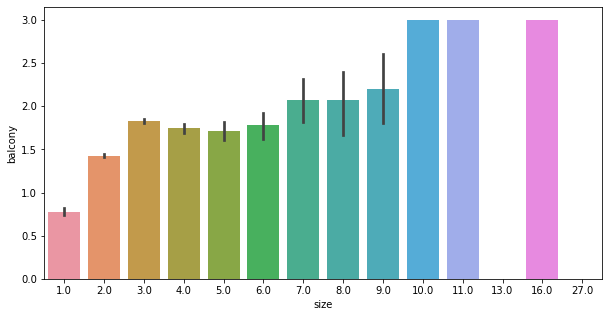

In [19]:
sns.barplot(df5['size'], df5['balcony'])

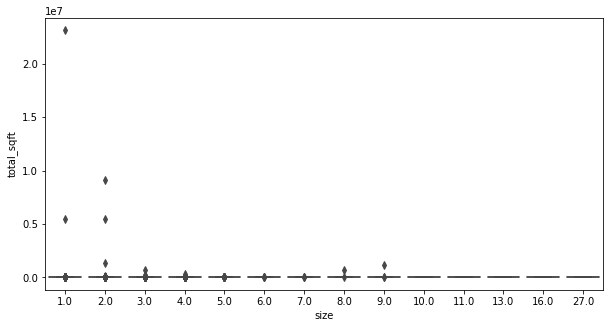

In [20]:
sns.boxplot(df5['size'], df5['total_sqft'])

In [75]:
df6 = df5.loc[~((df5['price'] * 100000)/ df5['total_sqft'] < 2500  )]
df6 = df6[~((df6['size'] > 8) | (df6['bath'] > 8))]
#df6 = df6.loc[~(df6['size'] > 15)]
df6.shape

(12735, 7)

In [76]:
df6.head()

,location,size,total_sqft,bath,balcony,price,location_code
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,418
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,316
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,1177
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,755
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,714


In [77]:
df6.bath.unique()
df6[df6['size'] > 8]

,location,size,total_sqft,bath,balcony,price,location_code


In [107]:
## Feature Engineering step
df6['price_per_sqft'] = df6['price']*100000/df6['total_sqft']
df6.head()

,location,size,total_sqft,bath,balcony,price,location_code,price_per_sqft
0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07,418,3699.810606
1,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00,316,4615.384615
2,Uttarahalli,3.0,1440.0,2.0,3.0,62.00,1177,4305.555556
3,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00,755,6245.890861
4,Kothanur,2.0,1200.0,2.0,1.0,51.00,714,4250.000000


In [131]:
loc_count = df6['location'].value_counts()
loc_count_less10 = loc_count[loc_count < 10]
df6['location'] = df6['location'].apply(lambda x: 'other' if x in loc_count_less10 else x)
df6['location'] = df6[~(df6['location'] == 'other')]
#print(df6.location.unique())

In [132]:
def size_outliers(df):
    new_df = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        mu = np.mean(sub_df.price_per_sqft)
        st = np.std(sub_df.price_per_sqft)
        std2_df = sub_df[(sub_df['price_per_sqft'] > (mu - st)) & (sub_df['price_per_sqft'] <= (mu + st)) ]
        new_df = pd.concat([new_df, std2_df], ignore_index = True)
    return new_df
temp = size_outliers(df6)

In [133]:

df7 = df6[['size', 'total_sqft', 'bath', 'balcony', 'price', 'location_code' ]]

In [134]:
df7.location_code.astype('category')

0         418
1         316
2        1177
3         755
4         714
         ... 
13314     473
13315    1250
13317     970
13318     905
13319     395
Name: location_code, Length: 12735, dtype: category
Categories (1243, int64): [0, 1, 2, 3, ..., 1298, 1299, 1301, 1302]

In [130]:
#One Hot Encoding
one_hot = df6.drop(['location_code'], axis = 1)

dummies = pd.get_dummies(one_hot.location)
one_hot_df = pd.concat([one_hot, dummies], axis = 'columns' )
one_hot_df.drop(['location'], axis = 1, inplace = True)
one_hot_df.head()

,size,total_sqft,bath,balcony,price,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,1056.0,2.0,1.0,39.07,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2600.0,5.0,3.0,120.00,4615.384615,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,3.0,62.00,4305.555556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,1.0,95.00,6245.890861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,1.0,51.00,4250.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Modelling with Learning algorithms

In [135]:
#### Train test split
from sklearn.model_selection import train_test_split
X = df7.drop(['price'], axis = 'columns')
y = df7.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X.shape

(12735, 5)

In [136]:

X = one_hot_df.drop(['price'], axis = 'columns')
y = one_hot_df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

### Linear Regression

In [137]:
from sklearn.linear_model import LinearRegression
np.random.seed(20)
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

predict = model_LR.predict(X_test)
print("Train Accuracy is {0}".format(model_LR.score(X_train, y_train)))
print ("Accuracy of Linear Regression is {0}".format(model_LR.score(X_test, y_test)))

Train Accuracy is 0.8254030322446
Accuracy of Linear Regression is 0.840636883863566


### SGDRegressor

In [138]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

for alpha in [0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.001, 0.0005, 0.00001]:
    for iterate in [ 100, 500, 1000, 5000, 10000, 50000]:
        for loss in ['squared_loss']:
            model_SGD = make_pipeline(StandardScaler(), SGDRegressor(alpha = alpha, max_iter=1000, tol=1e-3))
            model_SGD.fit(X_train, y_train)
            predict = model_SGD.predict(X_test)
            print("Train Accuracy is {0}".format(model_SGD.score(X_train, y_train)))
            print ("Accuracy of Linear Regression with loss function {0}, learning rate {1} and no.of iteration {2} is {3}".format(loss, alpha, iterate, model_SGD.score(X_test, y_test)))

Train Accuracy is 0.8067467830499067
Accuracy of Linear Regression with loss function squared_loss, learning rate 0.1 and no.of iteration 100 is 0.815537738933113
Train Accuracy is 0.8139230058279493
Accuracy of Linear Regression with loss function squared_loss, learning rate 0.1 and no.of iteration 500 is 0.8140585801533253
Train Accuracy is 0.8155508282224415
Accuracy of Linear Regression with loss function squared_loss, learning rate 0.1 and no.of iteration 1000 is 0.8201290238418562
Train Accuracy is 0.7966144261720166
Accuracy of Linear Regression with loss function squared_loss, learning rate 0.1 and no.of iteration 5000 is 0.8029522036794327
Train Accuracy is 0.8169447806174689
Accuracy of Linear Regression with loss function squared_loss, learning rate 0.1 and no.of iteration 10000 is 0.8248695760323119
Train Accuracy is 0.807918719968753
Accuracy of Linear Regression with loss function squared_loss, learning rate 0.1 and no.of iteration 50000 is 0.8158744093079507
Train Accura

Train Accuracy is 0.7794837910642854
Accuracy of Linear Regression with loss function squared_loss, learning rate 1e-05 and no.of iteration 1000 is 0.7824233068819797
Train Accuracy is 0.8107341268680074
Accuracy of Linear Regression with loss function squared_loss, learning rate 1e-05 and no.of iteration 5000 is 0.8282169161011136
Train Accuracy is 0.8094424646818679
Accuracy of Linear Regression with loss function squared_loss, learning rate 1e-05 and no.of iteration 10000 is 0.8443223899285754
Train Accuracy is 0.7989175166242487
Accuracy of Linear Regression with loss function squared_loss, learning rate 1e-05 and no.of iteration 50000 is 0.8152414871505853


### Lasso Regression

In [139]:
from sklearn.linear_model import Lasso
for alpha in [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0001, 0.0005, 0.00001, 0.00005, 0.0000001, 0.0000005, 0.00000001]:
    #for iterate in [10, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]:
    model_Lasso = Lasso(alpha=alpha)
    model_Lasso.fit(X_train, y_train)
    predict = model_Lasso.predict(X_test)
    print("Train Accuracy is {0}".format(model_Lasso.score(X_train, y_train)))
    print ("Accuracy of Lasso Regression with learning rate: {0} is {1}".format(alpha, model_Lasso.score(X_test, y_test)))

Train Accuracy is 0.8061346169698193
Accuracy of Lasso Regression with learning rate: 0.5 is 0.8407076269471915
Train Accuracy is 0.8191621707212969
Accuracy of Lasso Regression with learning rate: 0.1 is 0.8417656029774063
Train Accuracy is 0.821948075319302
Accuracy of Lasso Regression with learning rate: 0.05 is 0.8411441744650269
Train Accuracy is 0.8248995401278936
Accuracy of Lasso Regression with learning rate: 0.01 is 0.8408766481546011
Train Accuracy is 0.8252478846893601
Accuracy of Lasso Regression with learning rate: 0.005 is 0.8408676168728391
Train Accuracy is 0.8253958923103344
Accuracy of Lasso Regression with learning rate: 0.001 is 0.8407265072085957
Train Accuracy is 0.8254029594097148
Accuracy of Lasso Regression with learning rate: 0.0001 is 0.8406468248387643
Train Accuracy is 0.8254012346644617
Accuracy of Lasso Regression with learning rate: 0.0005 is 0.8406847932222362
Train Accuracy is 0.8254030315133758
Accuracy of Lasso Regression with learning rate: 1e-05 i

### Elastic Net CV

In [140]:
from sklearn.linear_model import ElasticNetCV
for cv in [5, 10, 15, 20]:
    model_elasnet = ElasticNetCV(cv=cv, random_state=100)
    model_elasnet.fit(X_train, y_train)
    print("Train error is {0}".format(model_elasnet.score(X_train, y_train)))
    print ("Accuracy of Elastic Net Regression with cross validation sets {0} is {1}".format(cv, model_elasnet.score(X_test, y_test)))

Train error is 0.8012286213527697
Accuracy of Elastic Net Regression with cross validation sets 5 is 0.8280164675884198
Train error is 0.8015378172210748
Accuracy of Elastic Net Regression with cross validation sets 10 is 0.8293103924183011
Train error is 0.8015669418605273
Accuracy of Elastic Net Regression with cross validation sets 15 is 0.8295051009604599
Train error is 0.8015378172210748
Accuracy of Elastic Net Regression with cross validation sets 20 is 0.8293103924183011


### Suppor Vector Machine


In [118]:
from sklearn import svm
model_svm = svm.SVR()
weights = np.abs(np.random.randn(len(X_train)))
model_svm.fit(X_train, y_train, sample_weight = weights)
print("Train Accuracy is {0}".format(model_svm.score(X_train, y_train)))
print ("Accuracy of SVM Regressor is {1}".format(cv, model_svm.score(X_test, y_test)))

Train Accuracy is 0.42220352821051643
Accuracy of SVM Regressor is 0.4538591385757862


In [119]:

# for i in ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']:   
#     model_nu_svm = svm.NuSVR(kernel = i)
#     model_nu_svm.fit(X_train, y_train)
#     print("Train error is {0}".format(model_nu_svm.score(X_train, y_train)))
#     print ("Accuracy of Nu-SVM Regressor is {1}".format(cv, model_nu_svm.score(X_test, y_test)))

In [120]:

model_svm_linear = svm.LinearSVR()
model_svm_linear.fit(X_train, y_train)
print("Train Accuracy is {0}".format(model_svm_linear.score(X_train, y_train)))
print ("Accuracy of Nu-SVM Regressor is {1}".format(cv, model_svm_linear.score(X_test, y_test)))

Train Accuracy is 0.5578056033892034
Accuracy of Nu-SVM Regressor is 0.5605652443204303


C:\Users\Viswanathan\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Neural Network

In [141]:
## Multilayer Perceptron

from sklearn.neural_network import MLPRegressor
for layers in [ (15, 15)]:
    
    model_nnp = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes= layers).fit(X_train, y_train)
    model_nnp.predict(X_test)
    print("Train Accuracy is {0}".format(model_nnp.score(X_train, y_train)))
    print ("Accuracy of Multilayer Perceptron Regressor with (units, layers): {0}  is {1}".format(layers, model_nnp.score(X_test, y_test)))

Train Accuracy is 0.8594289871433428
Accuracy of Multilayer Perceptron Regressor with (units, layers): (15, 15)  is 0.8606403710077788


In [142]:
X_train.head()

,size,total_sqft,bath,balcony,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
7149,3.0,1409.0,2.0,3.0,4400.283889,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,3.0,1375.0,3.0,2.0,5454.545455,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6565,3.0,1500.0,3.0,0.0,4800.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5842,2.0,1180.0,2.0,1.0,3500.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4748,2.0,1025.0,2.0,2.0,4878.048780,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
def get_input(location, total_sqft, size, bath, balcony):
    loc_index = np.where(X.columns == location)[0][0]
    print(loc_index)
    x = np.reshape(np.zeros(len(X.columns)))
    print(x.shape)
    x[0] = size
    x[1] = total_sqft
    x[2] = bath
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1
    return model_nnp.predict(x)

get_input('Whitefield', 1600, 3, 2, 1)

245
(251,)


ValueError: Expected 2D array, got 1D array instead:
array=[3.0e+00 1.6e+03 2.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.